In [1]:
import re
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
ex = pd.read_csv('../data/ALL_EXHIBITIONS (post 90).csv', sep=';', encoding='utf-8', low_memory=False)
art = pd.read_csv('../data/ALL_ARTWORKS.csv', sep=',', encoding='utf-8', low_memory=False)

In [3]:
clean = pd.read_csv('../data/ALL_EXHIBITIONS (post 90 with collection).csv', sep=';', encoding='utf-8', low_memory=False)

In [4]:
ex.sample(3)

,exhibition,title,place,museum,town,time,start_date,end_date,artworks
21754,Scénographies de Dan Graham à Hubert Robert : ...,Scénographies de Dan Graham à Hubert Robert,"Bourg-lès-Valence (France), Lycée agricole du ...",Lycée agricole du Valentin,Bourg-lès-Valence (France),14 mars 2009-28 juin 2009,2009-03-14,2009-06-28,460000000001211 | 460000000001210 | 4600000000...
27621,"Rugby : Bram (France), Les Essart(t)s, 06 juin...",Rugby,"Bram (France), Les Essart(t)s",Les Essart(t)s,Bram (France),06 juin 2015-06 septembre 2015,2015-06-06,2015-09-06,370000000000588 | 370000000000589
45455,Exposition. Printemps de Cahors. : 1996-,Exposition. Printemps de Cahors.,NaN,NaN,NaN,1996,1996-00-00,1996-00-00,140000000069304


In [5]:
# exposed = [[e for e in re.split(r' \| ', x['artworks'])] for i, x in ex.iterrows()]
# exposed = pd.Series(list(set([e for row in exposed for e in row])))

ex['collection'] = None
ex['acquisition_year'] = None
for i, e in ex.iterrows():
    artworks = re.split(r' \| ', e['artworks'])
    cols, years = [], []
    for a in artworks:
        col = art[art['_id'] == int(a)]['collection'].values[0]
        if not pd.isnull(col):
            cols.append(col)
        year = art[art['_id'] == int(a)]['acquisition_year'].values[0]
        if not pd.isnull(year):
            years.append(year)
    if len(years) > 0:
        ex.at[i, 'acquisition_year'] = min(years)
    if len(set(cols)) == 1:
        ex.at[i, 'collection'] = cols[0]
    if i % 10000 == 0:
        print("Percentage:", int(i/len(ex) * 100), "total:", i)

In [6]:
for c in clean.columns:
    print("---- %s ---" % c)
    print(f'Count: {clean[c].count()}\tProportion: {round(100*clean[c].count()/clean["exhibition"].count(), 3)}%\t Diff: {- clean[c].count() + clean["exhibition"].count()}')

---- Column1 ---
Count: 59578	Proportion: 100.0%	 Diff: 0
---- exhibition ---
Count: 59578	Proportion: 100.0%	 Diff: 0
---- title ---
Count: 57022	Proportion: 95.71%	 Diff: 2556
---- place ---
Count: 51442	Proportion: 86.344%	 Diff: 8136
---- museum ---
Count: 51597	Proportion: 86.604%	 Diff: 7981
---- town ---
Count: 51686	Proportion: 86.753%	 Diff: 7892
---- time ---
Count: 57115	Proportion: 95.866%	 Diff: 2463
---- start_date ---
Count: 57129	Proportion: 95.889%	 Diff: 2449
---- end_date ---
Count: 57129	Proportion: 95.889%	 Diff: 2449
---- artworks ---
Count: 59578	Proportion: 100.0%	 Diff: 0
---- collection ---
Count: 57611	Proportion: 96.698%	 Diff: 1967
---- acquisition_year ---
Count: 58867	Proportion: 98.807%	 Diff: 711


In [7]:
# ex['town'].sample(10)

In [8]:
# ex['collection'].sample(10)

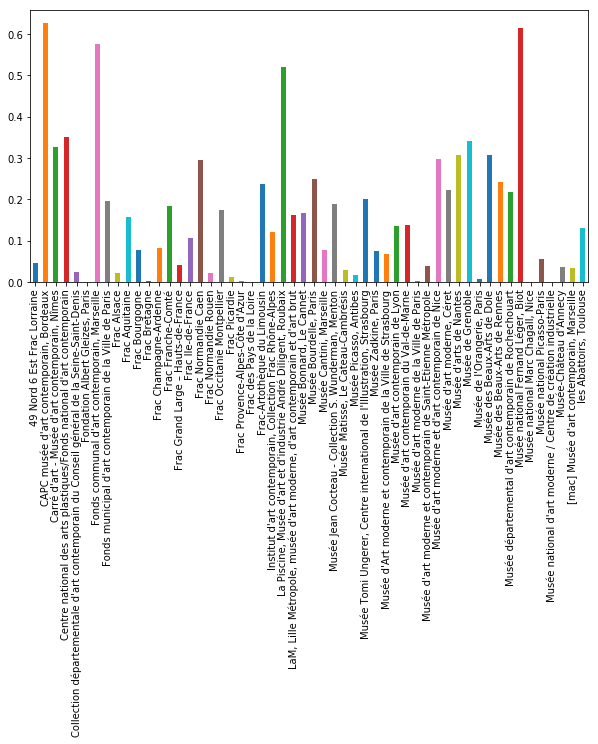

In [17]:
a = clean['collection'].value_counts()
b = clean[pd.isnull(clean['town'])]['collection'].value_counts()
x = b/a
x.plot(kind='bar', figsize=(10,5))

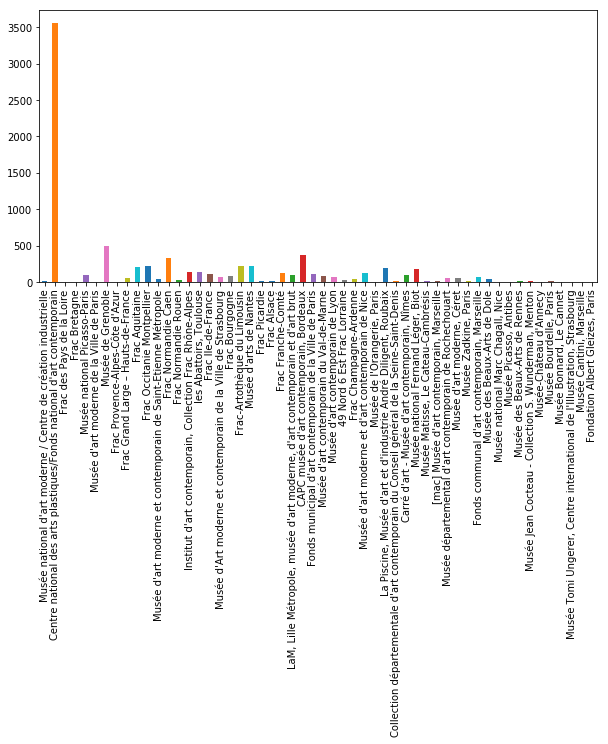

In [18]:
bad = clean[pd.isnull(clean['town'])]
bad['collection'].value_counts()
new = bad['collection'].value_counts().reindex(clean['collection'].value_counts().index)
new.index = clean['collection'].value_counts().index
new.plot(kind='bar', figsize=(10,5))

In [11]:
subset = clean[(clean['collection'].str.contains("Musée national d'art moderne", na=False)) & (pd.isnull(clean['town']))]

In [12]:
# ex.to_csv("../data/ALL_EXHIBITIONS (post 90 with collection).csv", sep=';', encoding='utf-8',)

In [13]:
subset.sample(5)

,Column1,exhibition,title,place,museum,town,time,start_date,end_date,artworks,collection,acquisition_year
52368,53030,Le mouvement des images : 2006-,Le mouvement des images,NaN,NaN,NaN,2006,2006-00-00,2006-00-00,150000000046197 | 150000000027355,Musée national d'art moderne / Centre de créat...,1996.0
59471,60151,"Accrochage ""Made in France"" en janvier 1997. L...","Accrochage ""Made in France""",NaN,NaN,NaN,NaN,1997-00-00,1997-00-00,150000000020392,Musée national d'art moderne / Centre de créat...,1990.0
15856,15874,Roger-Edgar Gillet : 50 ans de peinture : 26 j...,Roger-Edgar Gillet : 50 ans de peinture,NaN,NaN,NaN,26 juin 1999-27 septembre 1999,1999-06-26,1999-09-27,150000001546962,Musée national d'art moderne / Centre de créat...,2017.0
2232,2233,"Rio de Janeiro : Paço imperial, 1999",Rio de Janeiro : Paço imperial,NaN,NaN,NaN,1999,1999-00-00,1999-00-00,150000000045080,Musée national d'art moderne / Centre de créat...,2006.0
59468,60148,"Accrochage ""Made in France""en janvier 1997. Le...","Accrochage ""Made in France""",NaN,NaN,NaN,NaN,1997-00-00,1997-00-00,150000000028340,Musée national d'art moderne / Centre de créat...,1989.0


In [14]:
# data['start_date'] = data['start_date']
ex['start_year'] = ex['start_date'].str.split("-").str[0]
ex['start_month'] = ex['start_date'].str.split("-").str[1]
ex['start_day'] = ex['start_date'].str.split("-").str[2]
# data['start_month']

In [15]:
clean[clean['collection'] == 'Musée national Fernand Léger, Biot']['exhibition'].value_counts()

La Grande Parade, Portrait de l'artiste en clown. : Paris (France), Galeries nationales du Grand Palais, 09 février 2004-31 mai 2004 // Ottawa (Canada), National Gallery of Canada, 25 juin 2004-30 août 2004                                            2
Willy Baumeister et la France : Colmar (France), Musée d'Unterlinden, 04 septembre 1999-05 décembre 1999 // Saint-Etienne (France), Musée d'art et d'industrie de Saint-Etienne, 20 décembre 1999-26 mars 2000                                            2
Tokyo, "Fernand Léger" Mitsukoshi Museum of Art, du 23 Novembre au 27 décembre 1993, catalogue N°67 repr couleurs p 85 ( exposition itinérante)                                                                                                           1
Acrobate mime parfait, musée Zadkine, Paris du12/06 au 14/09 : 1997-                                                                                                                                                                                

In [21]:
art['authors']

0         9000000000068354
1         9000000000068354
2         9000000000068354
3         9000000000068354
4         9000000000068354
5         9000000000068354
6         9000000000068354
7         9000000000068354
8         9000000000068354
9         9000000000068354
10        9000000000068354
11        9000000000068354
12        9000000000068354
13        9000000000068354
14        9000000000068354
15        9000000000068354
16        9000000000068354
17        9000000000068354
18        9000000000068354
19        9000000000068354
20        9000000000068354
21        9000000000068354
22        9000000000068354
23        9000000000068354
24        9000000000068354
25        9000000000068354
26        9000000000068354
27        9000000000068354
28        9000000000068354
29        9000000000068354
                ...       
374962    9000000000071007
374963    9000000000071007
374964    9000000000071007
374965    9000000000071007
374966    9000000000071007
374967    9000000000071007
3